In [1]:
import numpy as np
from sklearn.ensemble import * 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification(n_samples=1000,n_features=4,n_informative=2,n_redundant=0,random_state=0,shuffle=False)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [3]:
clf = GradientBoostingClassifier(n_estimators=1000,random_state=42)


In [4]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=42)

In [5]:
y_pred = clf.predict(X_test)


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For binary classification
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9156626506024096
Recall: 0.926829268292683
F1 Score: 0.9212121212121213


ROC AUC Area: 0.9699529826623567


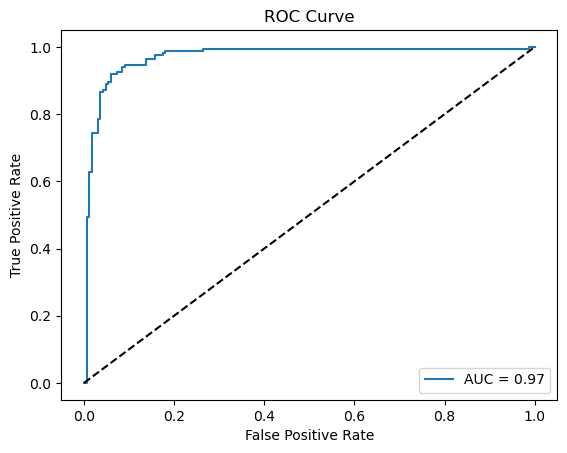

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]  

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Area:", auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], 'k--')  # diagonal line (random guess)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
